In [69]:
import pandas as pd
from fuzzywuzzy import process

# Load the datasets
laliga_stats_path = 'laliga_player_stats_english.csv'
standings_path = 'league_standings_19_20.csv'

laliga_stats = pd.read_csv(laliga_stats_path)
league_standings = pd.read_csv(standings_path)

# Display a sample of the datasets
print("La Liga Stats Sample:")
print(laliga_stats.head())

print("\nLeague Standings Sample:")
print(league_standings.head())


La Liga Stats Sample:
            Team    Position  Shirt number          Name  Minutes played  \
0  Athletic Club  Goalkeeper           NaN  Hodei Oleaga           0.000   
1  Athletic Club  Goalkeeper           1.0     A. Remiro           0.000   
2  Athletic Club  Goalkeeper          13.0      Herrerín           2.790   
3  Athletic Club  Goalkeeper          25.0    Unai Simón         630.000   
4  Athletic Club    Defender           3.0         Núñez           1.063   

   Games played Percentage of games played  Full games played  \
0             0                      0.00%                  0   
1             0                      0.00%                  0   
2            31                     82.00%                 31   
3             7                     18.00%                  7   
4            12                     32.00%                 11   

  Percentage of full games played  Games started  ... Corners  Tackles.1  \
0                           0.00%              0  ... 

In [ ]:
import pandas as pd
from fuzzywuzzy import process

# File paths
laliga_stats_path = 'laliga_player_stats_english.csv'
standings_path = 'league_standings_19_20.csv'
output_file_path = 'laliga_player_stats_cleaned_with_ranking.csv'

# Load datasets
laliga_stats = pd.read_csv(laliga_stats_path)
league_standings = pd.read_csv(standings_path)

# Remove the "Shirt number" column
laliga_stats_cleaned = laliga_stats.drop(columns=['Shirt number'], errors='ignore')

# Remove duplicate rows based on 'Name' and 'Team'
laliga_stats_cleaned = laliga_stats_cleaned.drop_duplicates(subset=['Name', 'Team'], keep='first')

# Convert team names to strings and handle missing values
laliga_stats_cleaned['Team'] = laliga_stats_cleaned['Team'].astype(str).fillna("")
league_standings['Team'] = league_standings['Team'].astype(str).fillna("")

# Extract unique team names from both datasets
laliga_teams = laliga_stats_cleaned['Team'].unique()
standings_teams = league_standings['Team'].unique()

# Perform fuzzy matching to map team names
team_mapping = {}
for team in standings_teams:
    closest_match = process.extractOne(team, laliga_teams)
    if closest_match:  # Ensure a match was found
        team_mapping[team] = closest_match[0]

# Display the team name mappings
print("\nTeam Name Mappings:")
for standings_team, matched_team in team_mapping.items():
    print(f"{standings_team} -> {matched_team}")

# Replace the team names in the standings dataset with the matched names
league_standings['Team'] = league_standings['Team'].map(team_mapping)

# Merge the ranking (Pos) column from standings into the cleaned La Liga player stats dataset
laliga_stats_with_ranking = pd.merge(
    league_standings[['Pos', 'Team']],  # 'Pos' first for the left-hand side merge
    laliga_stats_cleaned,
    on='Team',
    how='left'
)

# Save the updated dataset to a new file
laliga_stats_with_ranking.to_csv(output_file_path, index=False)

# Display a sample of the cleaned and updated dataset
print("\nCleaned and Updated Dataset with Rankings:")
print(laliga_stats_with_ranking.head())

print(f"\nThe updated file has been saved as: {output_file_path}")



Team Name Mappings:
Real Madrid (C) -> Real Madrid
Barcelona -> FC Barcelona
Atlético Madrid -> Atlético de Madrid
Sevilla -> Sevilla FC
Villarreal -> Villarreal CF
Real Sociedad -> Real Sociedad
Granada -> Girona FC
Getafe -> Getafe CF
Valencia -> Valencia CF
Osasuna -> FC Barcelona
Athletic Bilbao -> Athletic Club
Levante -> Levante UD
Valladolid -> R. Valladolid CF
Eibar -> SD Eibar
Real Betis -> Real Betis
Alavés -> D. Alavés
Celta Vigo -> RC Celta
Leganés (R) -> R. Valladolid CF
Mallorca (R) -> R. Valladolid CF
Espanyol (R) -> RCD Espanyol

Updated Dataset with Rankings:
          Team    Position  Shirt number          Name  Minutes played  \
0  Real Madrid  Goalkeeper           NaN   Luca Zidane          90.000   
1  Real Madrid  Goalkeeper           1.0         Navas         900.000   
2  Real Madrid  Goalkeeper          25.0      Courtois           2.430   
3  Real Madrid    Defender           NaN  Javi Sánchez          45.000   
4  Real Madrid    Defender           2.0      

In [65]:
# Display the team name mappings
team_mapping2 = {}
for team in standings_teams:
    closest_match = process.extractOne(team, laliga_teams)
    if closest_match:  # Ensure a match was found
        team_mapping[team] = closest_match[0]

print("\nTeam Name Mappings2:")
for standings_team, matched_team in team_mapping.items():
    print(f"{standings_team} -> {matched_team}")



Team Name Mappings2:
Real Madrid (C) -> Real Madrid
Barcelona -> FC Barcelona
Atlético Madrid -> Atlético de Madrid
Sevilla -> Sevilla FC
Villarreal -> Villarreal CF
Real Sociedad -> Real Sociedad
Granada -> Girona FC
Getafe -> Getafe CF
Valencia -> Valencia CF
Osasuna -> FC Barcelona
Athletic Bilbao -> Athletic Club
Levante -> Levante UD
Valladolid -> R. Valladolid CF
Eibar -> SD Eibar
Real Betis -> Real Betis
Alavés -> D. Alavés
Celta Vigo -> RC Celta
Leganés (R) -> R. Valladolid CF
Mallorca (R) -> R. Valladolid CF
Espanyol (R) -> RCD Espanyol


In [60]:
# Replace the team names in the standings dataset with the matched names
league_standings['Team'] = league_standings['Team'].map(team_mapping)

# Merge the datasets on the 'Team' column
merged_data = pd.merge(league_standings, laliga_stats, on='Team', how='inner')

# Save the merged dataset for further analysis
merged_data_path = 'merged_laliga_data.csv'
merged_data.to_csv(merged_data_path, index=False)

# Display the merged dataset and path
print("\nMerged Dataset Sample:")
print(merged_data.head())

print(f"\nMerged Dataset Saved to: {merged_data_path}")



Merged Dataset Sample:
   Pos           Team  Pld   W  D   L  GF  GA  GD  Pts  ... Corners  \
0    6  Real Sociedad   38  16  8  14  56  48   8   56  ...       0   
1    6  Real Sociedad   38  16  8  14  56  48   8   56  ...       0   
2    6  Real Sociedad   38  16  8  14  56  48   8   56  ...       0   
3    6  Real Sociedad   38  16  8  14  56  48   8   56  ...       0   
4    6  Real Sociedad   38  16  8  14  56  48   8   56  ...       0   

   Tackles.1 Duels  Man-to-man duels  Aerial duels   Passes  Short passes  \
0          0     0                 0             0    0.000           0.0   
1          2    22                 8            14  983.000         488.0   
2          1     8                 3             5  326.000         160.0   
3         39   267               189            78  899.000         788.0   
4         26   175                73           102    1.098         932.0   

  Long passes  Through balls Goals scored per attempt  
0           0              0  

In [49]:
import pandas as pd

# Load datasets
laliga_stats_path = 'laliga_player_stats_english.csv'
standings_path = 'league_standings_19_20.csv'

laliga_stats = pd.read_csv(laliga_stats_path)
league_standings = pd.read_csv(standings_path)

# Aggregate player statistics to compute team-level features
team_stats = laliga_stats.groupby('Team').agg({
    'Minutes played': 'sum',
    'Goals scored': 'sum',
    'Assists': 'sum',
    'Shots on target': 'sum',
    'Tackles': 'sum',
    'Passes': 'sum',
    'Successful dribbles': 'sum',
    'Interceptions': 'sum',
    'Recoveries': 'sum'
}).reset_index()

# Merge team-level stats with league standings
merged_data = pd.merge(league_standings, team_stats, on='Team')

# Display the merged dataset
print(merged_data.head())


   Pos           Team  Pld   W   D   L  GF  GA  GD  Pts  Minutes played  \
0    6  Real Sociedad   38  16   8  14  56  48   8   56        5398.179   
1   15     Real Betis   38  10  11  17  48  60 -12   41        4792.124   

   Goals scored  Assists  Shots on target  Tackles    Passes  \
0            44       27              144      109  9919.925   
1            41       30              158       77  5708.085   

   Successful dribbles  Interceptions  Recoveries  
0                  404            427        2283  
1                  418            352        2018  


In [ ]:
# Define features and target
features = [
    'Minutes played', 'Goals scored', 'Assists', 'Shots on target',
    'Tackles', 'Passes', 'Successful dribbles', 'Interceptions', 'Recoveries'
]
target = 'Pos'

X = merged_data[features]
y = merged_data[target]

# Standardize features for machine learning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



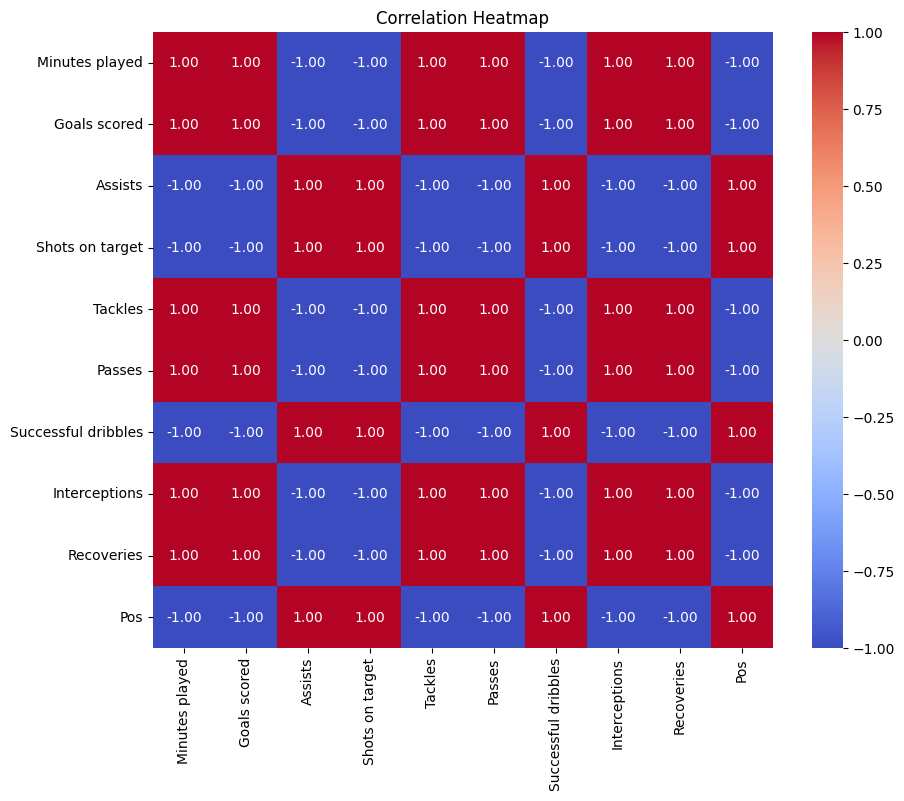

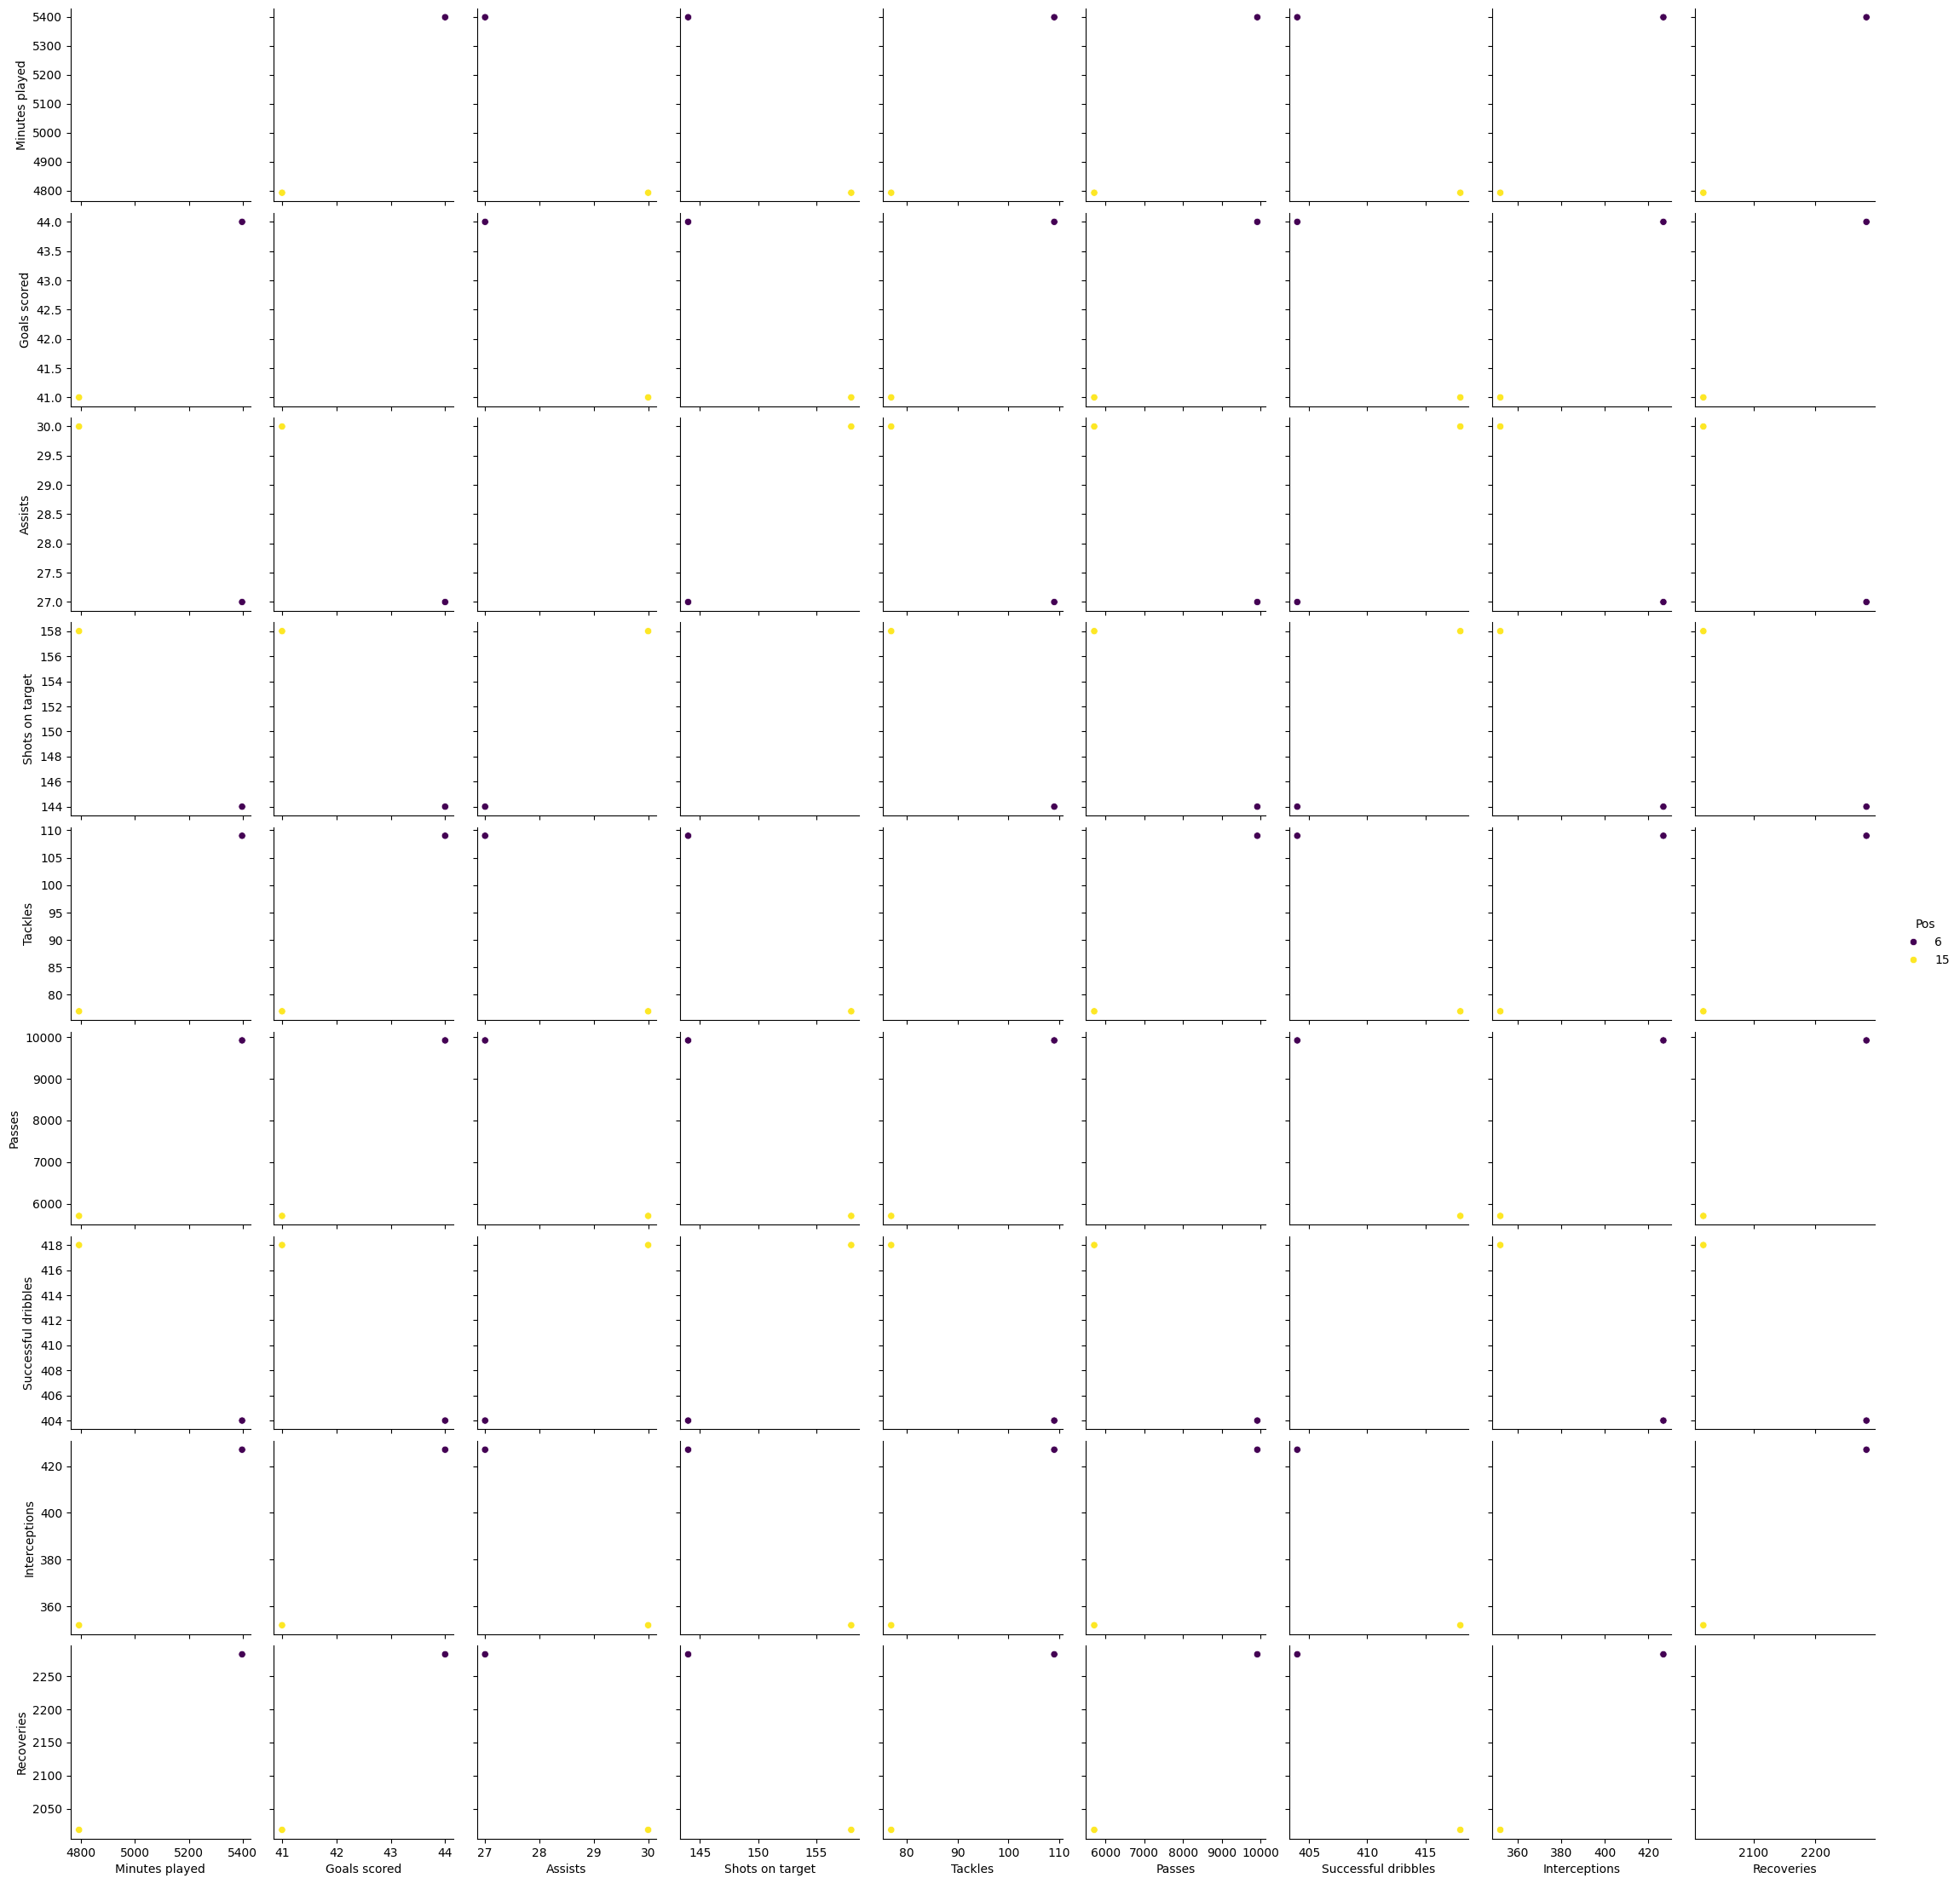

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[features + [target]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for relationships
sns.pairplot(merged_data, vars=features, hue='Pos', palette='viridis', height=2.5)
plt.show()


Monte Carlo Feature Importances:
               Feature  Importance
0       Minutes played    0.153846
8           Recoveries    0.153846
3      Shots on target    0.134615
5               Passes    0.134615
7        Interceptions    0.115385
1         Goals scored    0.096154
2              Assists    0.096154
4              Tackles    0.057692
6  Successful dribbles    0.057692


/var/folders/mq/w5bf80w55bs5t9nn7zqk8_sw0000gn/T/ipykernel_50102/906201387.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')


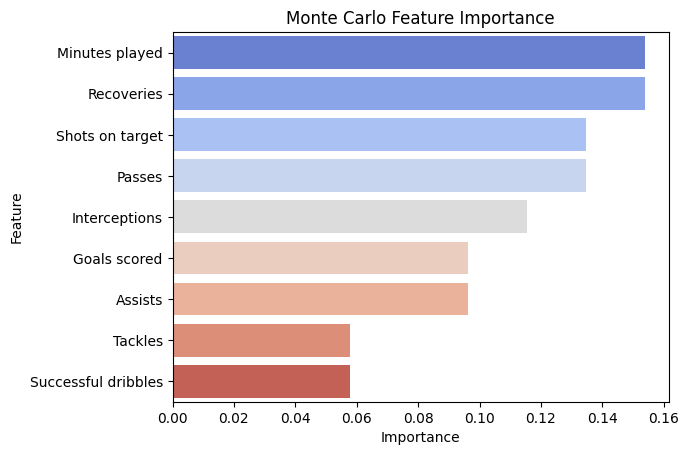

In [ ]:
import numpy as np

def monte_carlo_simulation(X, y, model, n_simulations=1000):
    """
    Perform Monte Carlo simulations to analyze feature importance.
    """
    feature_importances = np.zeros(X.shape[1])

    for _ in range(n_simulations):
        # Shuffle data
        shuffled_indices = np.random.permutation(len(y))
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Train model
        model.fit(X_shuffled, y_shuffled)

        # Accumulate feature importances
        if hasattr(model, 'feature_importances_'):
            feature_importances += model.feature_importances_

    # Average feature importance
    feature_importances /= n_simulations
    return feature_importances

# Perform Monte Carlo simulation with Random Forest
rf = RandomForestClassifier(random_state=42)
mc_feature_importances = monte_carlo_simulation(X_scaled, y, rf)

# Display feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': mc_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Monte Carlo Feature Importances:")
print(importance_df)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title("Monte Carlo Feature Importance")
plt.show()



# Spliting the data and training data

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Using Naive Bayes

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.12      0.29      0.17         7
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         5
           4       0.11      0.14      0.12         7
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         6
          11       0.25      0.12      0.17         8
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        10
          14       0.06      0.60      0.11        10
          15       0.00      0.00      0.00         8
          16       0.00      0.00    

/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

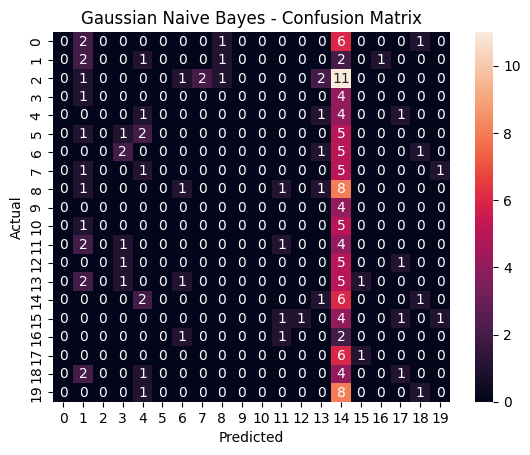

Gaussian Naive Bayes Accuracy: 5.99%


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test)

# Define class labels for the league positions
class_labels = [str(pos) for pos in sorted(y.unique())]

# Evaluate the model
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=class_labels))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate accuracy
accuracy_nb = np.trace(conf_matrix_nb) / np.sum(conf_matrix_nb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")


It is clear that the basic Naive Bayes classification does not works well with brutely on the whole data.

# Using KNN

k-Nearest Neighbors (kNN) Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.20      0.08        10
           1       0.00      0.00      0.00         7
           2       0.12      0.11      0.11        18
           3       0.06      0.20      0.10         5
           4       0.10      0.14      0.12         7
           5       0.11      0.11      0.11         9
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         8
          16       0.00      0.0

/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/billbao/Dropbox/Mac/Documents/2024 Fall/322/finalProject/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

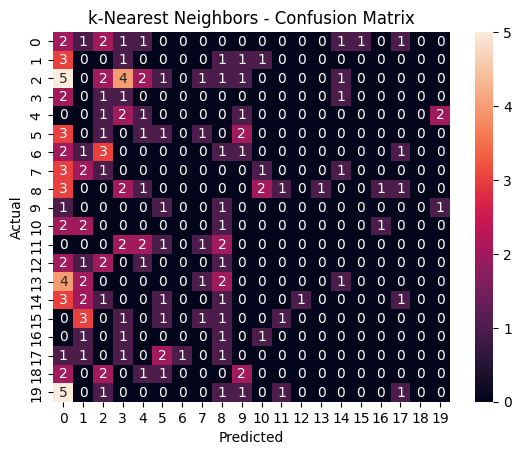

k-Nearest Neighbors Accuracy: 4.19%


In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Train kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Define class labels as strings
class_labels = [str(pos) for pos in sorted(y.unique())]

# Evaluate the model
print("k-Nearest Neighbors (kNN) Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=class_labels))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title("k-Nearest Neighbors - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate accuracy
accuracy_knn = np.trace(conf_matrix_knn) / np.sum(conf_matrix_knn)
print(f"k-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%")


This KNN model performs classification than Bayes model, as the data are strongly shows on diagonal. However, the overall accuracy is not as well.

# Using random Forest.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.12      0.14      0.13         7
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         8
          12       0.04      0.14      0.06         7
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00 

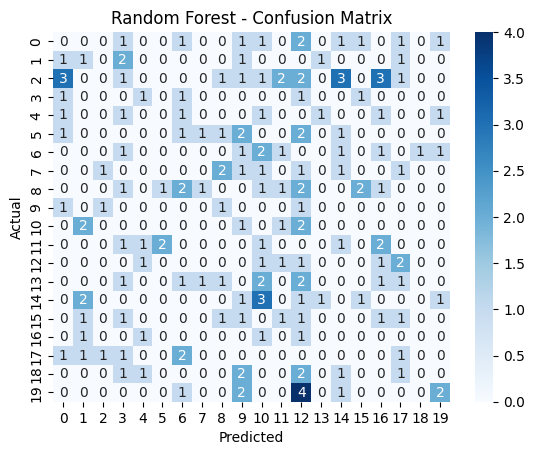

Random Forest Accuracy: 2.99%


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Define class labels for the league positions
class_labels = [str(pos) for pos in sorted(y.unique())]

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=class_labels))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate accuracy
accuracy_rf = np.trace(conf_matrix_rf) / np.sum(conf_matrix_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
